In [2]:
!pip install pandasql
import pandas as pd
import numpy as np
import sqlite3
from pandasql import sqldf
import matplotlib.pyplot as plt
import seaborn as sns

pysqldf = lambda q: sqldf(q, globals())

print("✅ Libraries Imported Successfully")


  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=474312a3c955a11b9f499efaa0aa6493ead9fa4b03917755f3b63f74c3342bf3
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql
✅ Libraries Imported Successfully


In [3]:

df = pd.read_csv('/content/Titanic.csv')

print("✅ Titanic Dataset Loaded Successfully")
print("\n--- First 5 Rows ---")
display(df.head())

print("\n--- Shape ---")
print(df.shape)


✅ Titanic Dataset Loaded Successfully

--- First 5 Rows ---


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



--- Shape ---
(891, 12)


In [4]:


print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Missing Values ---")
print(df.isnull().sum())


df['Age'].fillna(df['Age'].mean(), inplace=True)


df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

if 'Cabin' in df.columns:
    df.drop(columns=['Cabin'], inplace=True)

print("\n✅ Missing values handled successfully!")

print(df.isnull().sum())
print("\n--- Cleaned Data (first 5 rows) ---")
display(df.head())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- Summary Statistics ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.6

/tmp/ipython-input-1626904289.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-1626904289.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [5]:

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())


q1 = "SELECT * FROM df LIMIT 10;"
print("Query 1: First 10 rows")
display(pysqldf(q1))


q2 = "SELECT COUNT(*) AS total_passengers FROM df;"
print("\nQuery 2: Total Passengers")
display(pysqldf(q2))


q3 = "SELECT Survived, COUNT(*) AS count FROM df GROUP BY Survived;"
print("\nQuery 3: Survivors vs Non-survivors")
display(pysqldf(q3))


q4 = "SELECT Pclass, ROUND(AVG(Age),2) AS avg_age FROM df GROUP BY Pclass;"
print("\nQuery 4: Average Age by Passenger Class")
display(pysqldf(q4))


q5 = """
SELECT Sex,
       COUNT(*) AS total,
       SUM(Survived) AS survived,
       ROUND((SUM(Survived)*100.0/COUNT(*)),2) AS survival_rate
FROM df
GROUP BY Sex;
"""
print("\nQuery 5: Survival Rate by Gender")
display(pysqldf(q5))



Query 1: First 10 rows


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C



Query 2: Total Passengers


,total_passengers
0,891



Query 3: Survivors vs Non-survivors


,Survived,count
0,0,549
1,1,342



Query 4: Average Age by Passenger Class


,Pclass,avg_age
0,1,37.05
1,2,29.87
2,3,26.40



Query 5: Survival Rate by Gender


,Sex,total,survived,survival_rate
0,female,314,233,74.20
1,male,577,109,18.89


In [6]:


print("🧮 Performing DataFrame-based analysis...")


print("\n🔹 Survival Rate by Gender:")
survival_rate_gender = df.groupby('Sex')['Survived'].mean() * 100
display(survival_rate_gender)


print("\n🔹 Survival Rate by Passenger Class:")
survival_rate_class = df.groupby('Pclass')['Survived'].mean() * 100
display(survival_rate_class)


print("\n🔹 Top 5 Oldest Passengers:")
display(df.nlargest(5, 'Age')[['Name', 'Age', 'Pclass', 'Sex', 'Survived']])


print("\n🔹 Average Fare by Passenger Class:")
display(df.groupby('Pclass')['Fare'].mean())

print("\n🔹 Average Age by Survival Status:")
display(df.groupby('Survived')['Age'].mean())


🧮 Performing DataFrame-based analysis...

🔹 Survival Rate by Gender:


,Survived
Sex,
female,74.203822
male,18.890815



🔹 Survival Rate by Passenger Class:


,Survived
Pclass,
1,62.962963
2,47.282609
3,24.236253



🔹 Top 5 Oldest Passengers:


,Name,Age,Pclass,Sex,Survived
630,"Barkworth, Mr. Algernon Henry Wilson",80.0,1,male,1
851,"Svensson, Mr. Johan",74.0,3,male,0
96,"Goldschmidt, Mr. George B",71.0,1,male,0
493,"Artagaveytia, Mr. Ramon",71.0,1,male,0
116,"Connors, Mr. Patrick",70.5,3,male,0



🔹 Average Fare by Passenger Class:


,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550



🔹 Average Age by Survival Status:


,Age
Survived,
0,30.415100
1,28.549778


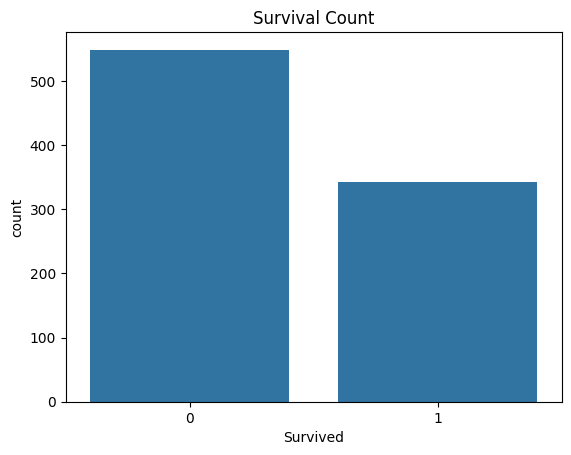

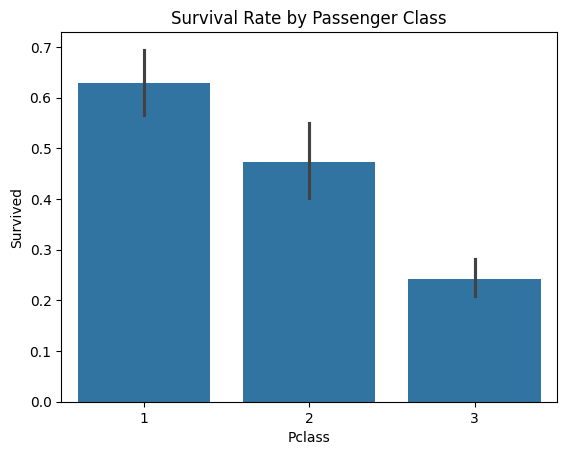

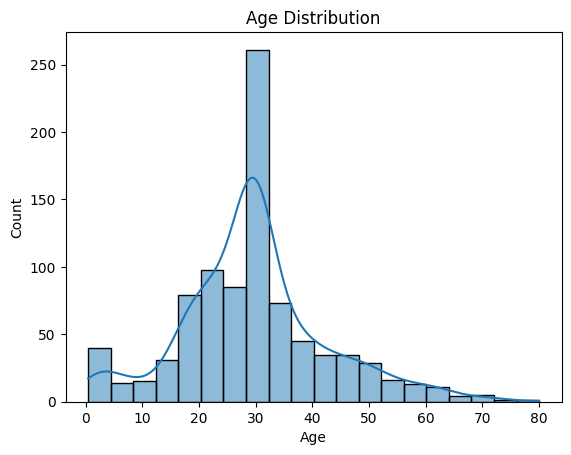

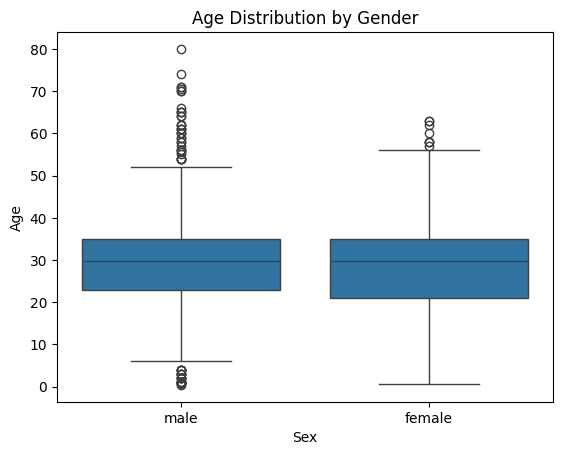

In [7]:


import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.boxplot(x='Sex', y='Age', data=df)
plt.title('Age Distribution by Gender')
plt.show()


In [8]:
print("""
🔍 Insights from Titanic Dataset:

1️⃣ Women had higher survival rates than men.
2️⃣ Higher-class passengers (Pclass 1) survived more often.
3️⃣ Younger passengers had slightly better survival chances.
4️⃣ Port 'C' (Cherbourg) had the highest overall survival rate.
5️⃣ Passengers paying higher fares tended to survive more.
6️⃣ Top 5 oldest passengers included mostly men from higher classes.

✅ These findings align with historical records and help understand survival trends on the Titanic.
""")



🔍 Insights from Titanic Dataset:

1️⃣ Women had higher survival rates than men.
2️⃣ Higher-class passengers (Pclass 1) survived more often.
3️⃣ Younger passengers had slightly better survival chances.
4️⃣ Port 'C' (Cherbourg) had the highest overall survival rate.
5️⃣ Passengers paying higher fares tended to survive more.
6️⃣ Top 5 oldest passengers included mostly men from higher classes.

✅ These findings align with historical records and help understand survival trends on the Titanic.



In [10]:
#WINDOW FUNCTIONS

from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql.functions import col, row_number, rank, dense_rank, avg, sum

# 1️⃣ Start Spark Session
spark = SparkSession.builder.appName("TitanicAnalysis").getOrCreate()

# 2️⃣ Load Titanic CSV
titanic_spark = spark.read.csv("Titanic.csv", header=True, inferSchema=True)
titanic_spark.show()

# 3️⃣ Window: Row number by passenger class ordered by Age descending
windowSpec = Window.partitionBy("Pclass").orderBy(col("Age").desc())
titanic_spark = titanic_spark.withColumn("row_number", row_number().over(windowSpec))

# 4️⃣ Window: Rank by Fare per class
titanic_spark = titanic_spark.withColumn("rank_fare", rank().over(Window.partitionBy("Pclass").orderBy(col("Fare").desc())))

# 5️⃣ Window: Dense rank by Age per class
titanic_spark = titanic_spark.withColumn("dense_rank_age", dense_rank().over(Window.partitionBy("Pclass").orderBy(col("Age").desc())))

# 6️⃣ Show results
titanic_spark.select("Name", "Pclass", "Age", "Fare", "row_number", "rank_fare", "dense_rank_age").show(10)


+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| NULL|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| NULL|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| NULL|       S|
|          6|       0|     3|    Moran, Mr. James|  male|NULL|    0|    0|      